# SeSiMe
### Sentence/Sequence Similarity Measure

### (1) BGC side
Import BGC data and create documents.

In [7]:
ROOT = "C:\\OneDrive - Netherlands eScience Center\\Project_Wageningen_iOMEGA"
path_sesime = ROOT + "\\SeSiMe\\"
path_save_model = ROOT + "\\SeSiMe\\models_trained\\"
path_bgc_data = ROOT + "\\Data\\Crusemann_dataset\\bgc_crusemann\\"
path_results = ROOT + "\\Data\\"

import sys
sys.path.insert(0, path_sesime)

import BGC_functions


In [2]:
filename_include = "*.*"
filename_exclude = "_2."

BGCs, BGCs_dict, BGC_documents = BGC_functions.load_BGC_data(path_bgc_data, 
                                                              filename_include, 
                                                              filename_exclude, 
                                                              path_results, 
                                                              results_file = "BGC_collected_data_02.json", 
                                                              filefilter="*cluster001.gbk",
                                                              entry = "single")

BGC json file found and loaded.


In [3]:
# Have a look at how a document looks like:
print(BGC_documents[1])

['PF13847', 'PF00891', 'PF13489', 'PF01209', 'PF13659', 'PF12847', 'PF08241', 'PF02353', 'PF08242', 'PF06325', 'PF13649', 'PF08704', 'PF05175', 'PF01170', 'PF13679', 'PF00398', 'PF01596', 'PF01135', 'PF02390', 'PF07021', 'PF01728', 'PF12697', 'PF12695', 'PF00561', 'PF01408', 'PF02629', 'PF02615', 'PF01546', 'PF01261', 'PF01408', 'PF00155', 'PF01041', 'PF01212', 'PF01053', 'PF01041', 'PF01212', 'PF01053', 'PF00266', 'PF01135', 'PF08704', 'PF01269', 'PF01209', 'PF13489', 'PF13659', 'PF12847', 'PF13847', 'PF13649', 'PF08242', 'PF08241', 'PF01040', 'PF02737', 'PF03446', 'PF03721', 'PF00984', 'PF03720', 'PF03594', 'PF00860', 'PF13191', 'PF00004', 'PF12806', 'PF00196', 'PF13936', 'PF14493', 'PF12680', 'PF14534', 'PF04545', 'PF08281', 'PF04542', 'PF13193', 'PF00501', 'PF07366', 'PF12680', 'PF14534', 'PF13474', 'PF13577', 'PF08332', 'PF13347', 'PF00083', 'PF07690', 'PF12832', 'PF06609', 'PF00083', 'PF13454']


In [4]:
len(BGC_documents)  # number of BGCs = number of documents

5927

#### Switch to general SeSiMe functionality
Once we have a corpus (e.g. through cells above), we can use SeSiMe to apply different similarity measuring methds. 

In [5]:
from Similarities import SimilarityMeasures

BGC_measure = SimilarityMeasures(BGC_documents)

C:\Users\FlorianHuber\Anaconda3\lib\site-packages\gensim\utils.py:1212: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")
Using TensorFlow backend.


In [6]:
BGC_measure.preprocess_documents(0.2, create_stopwords = False)

Preprocess documents...


## Word2Vec -based approach
### Compare different training parameters

+ Create Word2Vec based document centroid vectors based on models trained using different window sizes.

### Start with very large windows essentially catching the entire BGC document

In [8]:
file_model_word2vec = path_save_model + 'model_word2vec_bgc_crusemann_w150_d100.model' 
BGC_measure.build_model_word2vec(file_model_word2vec, size=100, window=150, 
                             min_count=1, workers=4, iter=250, 
                             use_stored_model=True)

Load stored word2vec model ...


In [10]:
BGC_measure.get_vectors_centroid(extra_weights=None, tfidf_weighted=True)
BGC_measure.get_centroid_similarity(num_hits=25, method='cosine')

  Calculated centroid vectors for  5927  of  5927  documents.Calculated distances between  5927  documents.


This has calculated (cosine) distances between all BGCs in an all-vs-all fashion.
The "num_hits" closest candidates for each BGC are listed in two matrices.

One stores the distances, the other the respective IDs.

#### Window size = 150

In [12]:
BGC_measure.list_similars_ctr[0,:]

array([1.        , 0.88391976, 0.88391976, 0.87747307, 0.81266889,
       0.79482817, 0.7406596 , 0.62908185, 0.58141427, 0.57713422,
       0.57713422, 0.5716119 , 0.57069798, 0.57069798, 0.57069798,
       0.57069798, 0.57069798, 0.57069798, 0.56920993, 0.56863257,
       0.5684218 , 0.5684218 , 0.5684218 , 0.5684218 , 0.56829085])

In [13]:
BGC_measure.list_similars_ctr_idx[0,:]

array([   0, 4346, 4238, 1203, 4503,  326, 5565, 5392, 2406, 1936,  594,
       2896,   92, 3679, 4737, 2473, 2007, 2281, 5764, 2672, 2051, 3707,
       4058, 1614, 3999])

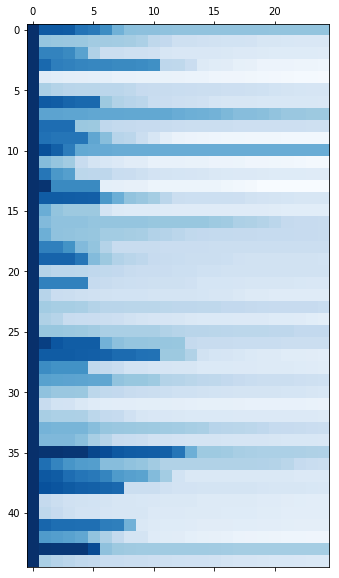

In [15]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,10))
ax.matshow(BGC_measure.list_similars_ctr[:45,:25], cmap=plt.cm.Blues)

### T-SNE of BGCs based on word2vec/ pfam2vec representation

In [18]:
import numpy as np
from sklearn.manifold import TSNE

X_embedded = TSNE(n_components=2).fit_transform(BGC_measure.vectors_centroid)
X_embedded.shape

(5927, 2)

In [37]:
BGC_types = []
BGC_filename = []
BGC_idx = []
for key, value in BGCs_dict.items():
    BGC_types.append(value["bgc_type"][0])   
    BGC_filename.append(key)
    BGC_idx.append(value["id"])

In [39]:
print(BGC_types[:10])
print(BGC_idx[:10])
print(BGC_filename[:10])

['cf_putative', 'cf_putative', 'tRNA_His_GTG', 'cf_putative', 'terpene', 'nrps', 'cf_saccharide', 'cf_putative', 'cf_putative', 'ectoine']
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
['15294.assembled_unknown.cluster001.gbk', '15294.assembled_unknown.cluster002.gbk', '15294.assembled_unknown.cluster003.gbk', '15294.assembled_unknown.cluster004.gbk', '15294.assembled_unknown.cluster005.gbk', '15294.assembled_unknown.cluster006.gbk', '15294.assembled_unknown.cluster007.gbk', '15294.assembled_unknown.cluster008.gbk', '15294.assembled_unknown.cluster009.gbk', '15294.assembled_unknown.cluster010.gbk']


In [59]:
def color_generator(N):
    import colorsys
    HSV_tuples = [(x*1.0/N, 0.5 + 0.5*int(N//2 == N/2), 0.5 + 0.5*int(N//2 == N/2)) for x in range(N)]
    RGB_tuples = [colorsys.hsv_to_rgb(*x) for x in HSV_tuples]
    return RGB_tuples


types_unique = list(set(BGC_types))
#selected_colors = BGC_functions.get_spaced_colors(len(types_unique)+1)   
selected_colors = color_generator(len(types_unique)+1) 
print(len(types_unique))

169


In [58]:
print(types_unique)

['t3pks-cf_fatty_acid ', 'bacteriocin-cf_fatty_acid ', 'bacteriocin-terpene', 'linaridin', 'otherks', 'oligosaccharide-otherks-t1pks-nrps', 'otherks-nrps', 'TPP riboswitch (THI element)', '16S rRNA. Bacterial SSU', 't2pks-butyrolactone', 'butyrolactone-nrps', 'nrps-cf_fatty_acid -lantipeptide-t1pks-otherks', 't1pks-terpene-nrps', 't2pks-cf_fatty_acid ', 'lantipeptide-t1pks-nrps', 'tRNA_Phe_GAA', 'thiopeptide-t1pks-terpene-nrps', 't1pks-cf_saccharide-nrps', 't2pks-cf_fatty_acid', 't2pks-siderophore', 'cf_fatty_acid -t1pks', 'nrps-t1pks-otherks', 'thiopeptide-terpene', 'ydaO/yuaA leader', 'thiopeptide-nrps', 'siderophore', 'butyrolactone', 'arylpolyene-nrps', 'tRNA_Ala_CGC', 'arylpolyene-t1pks-ladderane-cf_fatty_acid -nrps', 'tRNA_Pseudo_CCT', 'ladderane-nrps', 't1pks-cf_fatty_acid -nrps', 'bacteriocin-t1pks', 'amglyccycl-ladderane', 'cf_saccharide-nrps', 'cf_fatty_acid -transatpks-t1pks', 'arylpolyene', 'pfl RNA', 't1pks-transatpks-cf_fatty_acid ', 'tRNA_Leu_CAG', 'phosphonate', 'transa

In [60]:
colors = []
for bgc_type in BGC_types:
    colors.append(selected_colors[types_unique.index(bgc_type)])

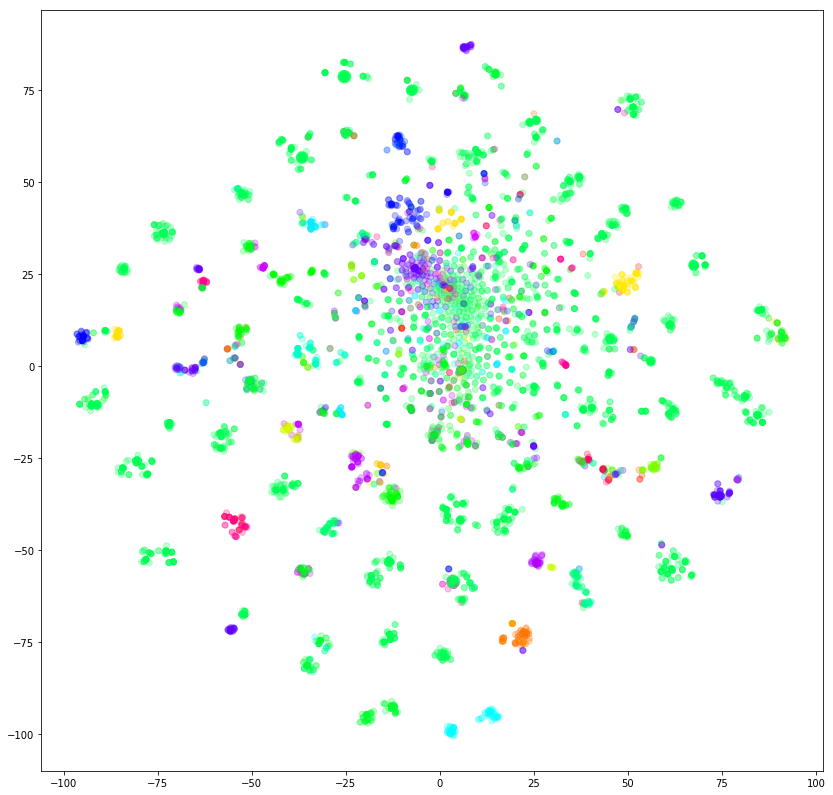

In [61]:
fig, ax = plt.subplots(figsize=(14,14))
plt.scatter(X_embedded[:,0], X_embedded[:,1], c=colors, alpha=0.25)

### Export tsne results as csv file

In [64]:
import csv
def TNSE_to_vsc(filename, X_tsne, BGC_filenames, BGC_types):
    csv.register_dialect('myDialect', delimiter = ',', lineterminator = '\r\n')
    
    with open(filename, 'w') as csvFile:
        writer = csv.writer(csvFile)
        writer.writerow(["bgc name," + "x position," + "y position,"+ "bgc type,"])
        for i, row in enumerate(BGC_filenames):
            writer.writerow([BGC_filenames[i] + "," + str(X_tsne[i,0]) + "," + str(X_tsne[i,1]) + "," + BGC_types[i] + "," ])
    csvFile.close()

In [65]:
filename = "TNSE_BGCs.csv"
TNSE_to_vsc(filename, X_embedded, BGC_filename, BGC_types)

### Plot genes to visually compare selected BGCs (compare large window and small window word2vec model)

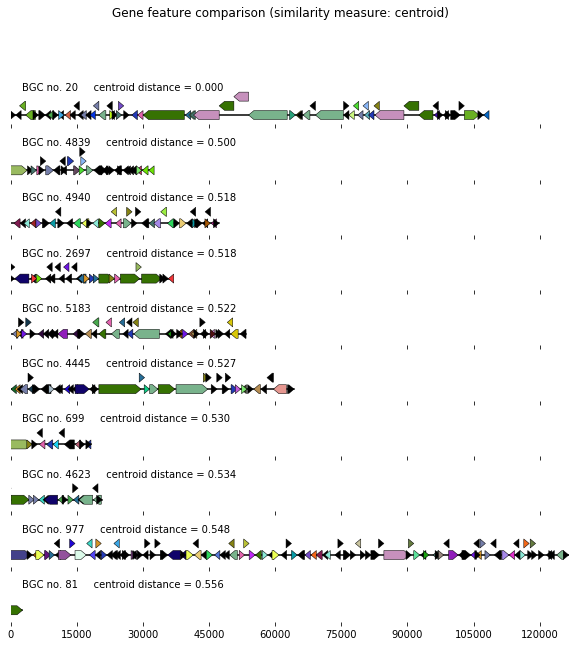

In [30]:
# Plot genes of closest candidates for query BGC id:
# intersting ones: 0, 7, 8, 9, 14, 43 (some very similar ones), 58
query_id = 20
BGC_functions.plot_bgc_genes(query_id, BGCs_dict, BGC_measure, num_candidates = 10, 
                   sharex=True, labels=False, dist_method = "centroid")

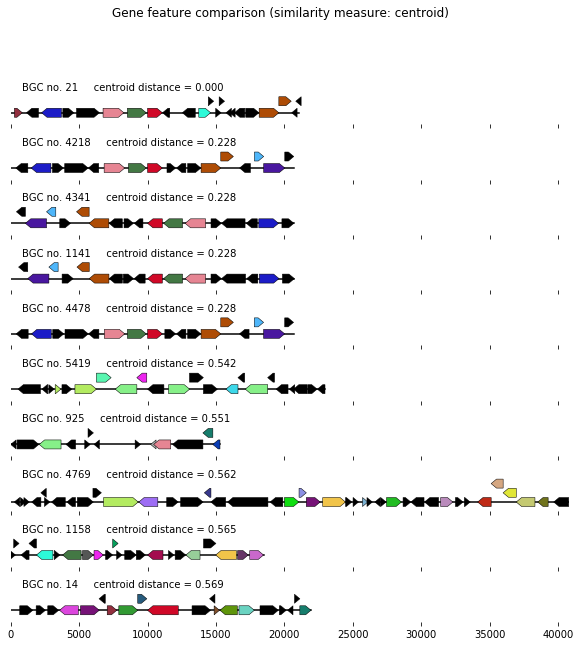

In [21]:
query_id = 21#37
BGC_functions.plot_bgc_genes(query_id, BGCs_dict, BGC_measure, num_candidates = 10, 
                   sharex=True, labels=False, dist_method = "centroid")

### Another attemt with 
+ even larger window size 
+ less dimension reduction (here to 200 instead of 100)
+ longer training (500 instead of 250 iterations)

In [23]:
BGC_measure300 = SimilarityMeasures(BGC_documents)
BGC_measure300.preprocess_documents(0.2, create_stopwords = False)

file_model_word2vec = path_save_model + 'model_word2vec_bgc_crusemann_w300_d200.model' 
BGC_measure300.build_model_word2vec(file_model_word2vec, size=200, window=300, 
                             min_count=1, workers=8, iter=500, 
                             use_stored_model=True)

Preprocess documents...
Stored word2vec model not found!
Calculating new word2vec model...
 Epoch  500  of  500 .

In [24]:
BGC_measure300.get_vectors_centroid(extra_weights=None, tfidf_weighted=True)
BGC_measure300.get_centroid_distances(num_hits=25, method='cosine')

  Calculated centroid vectors for  5927  of  5927  documents.Calculated distances between  5927  documents.


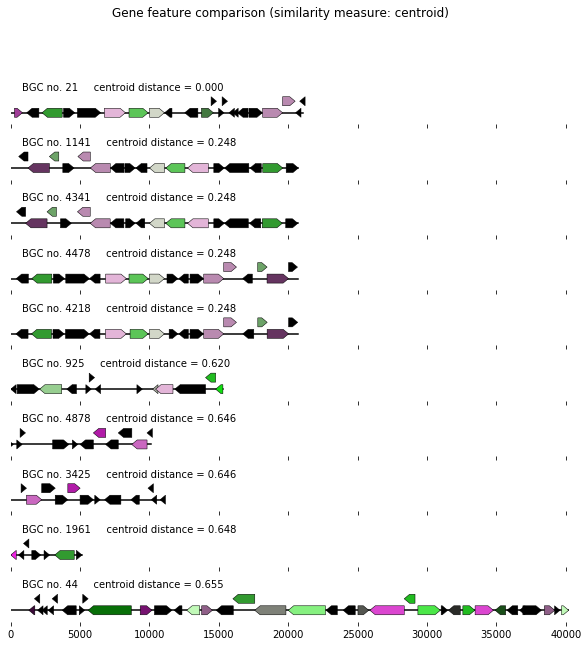

In [25]:
query_id = 21
BGC_functions.plot_bgc_genes(query_id, BGCs_dict, BGC_measure300, num_candidates = 10, 
                   sharex=True, labels=False, dist_method = "centroid")

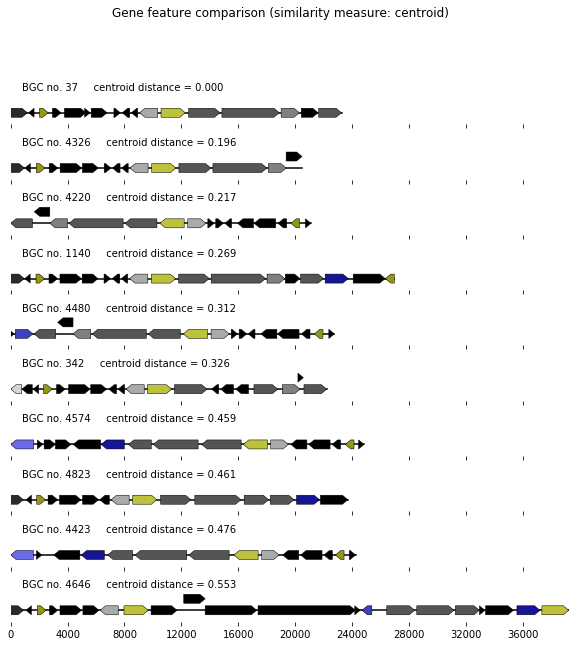

In [27]:
query_id = 37
BGC_functions.plot_bgc_genes(query_id, BGCs_dict, BGC_measure300, num_candidates = 10, 
                   sharex=True, labels=False, dist_method = "centroid")

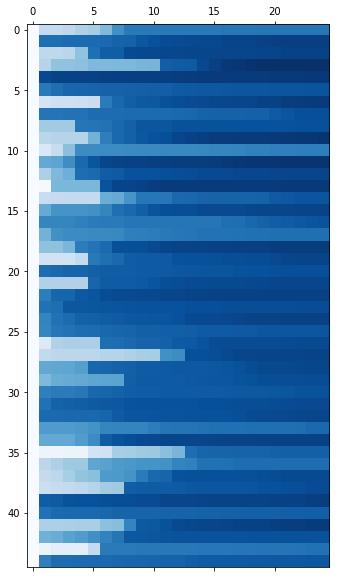

In [28]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,10))
ax.matshow(BGC_measure300.Cdistances_ctr[:45,:25], cmap=plt.cm.Blues)

### Try different similarity measuring methods...

#### A) Autoencoder
Will train a deep autoencoder to generate 100 dimensional (or = encoding_dim) vectors representing each document. 

In [81]:
file_model_ae = path_save_model + 'model_autoencoder_bgc_crusemann_d150.h5'
file_model_encoder = path_sesime + 'models_trained\\model_encoder_bgc_crusemann_d150.h5'
BGC_measure.build_autoencoder(file_model_ae, file_model_encoder, epochs = 50, batch_size = 1024, encoding_dim = 150,
                          layer_factors = (4,4,2))

No stored model found!
Creating new autoencoder model...
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 600)               1633200   
_________________________________________________________________
dense_18 (Dense)             (None, 600)               360600    
_________________________________________________________________
dense_19 (Dense)             (None, 300)               180300    
_________________________________________________________________
dense_20 (Dense)             (None, 150)               45150     
_________________________________________________________________
dense_21 (Dense)             (None, 300)               45300     
_________________________________________________________________
dense_22 (Dense)             (None, 600)               180600    
_________________________________________________________________
dense_23 (Dense)   

In [82]:
BGC_measure.get_autoencoder_similarity(num_hits=25, method='cosine')

In [83]:
import numpy as np
from sklearn.manifold import TSNE

X_embedded_ae = TSNE(n_components=2).fit_transform(BGC_measure.vectors_ae)
X_embedded_ae.shape

(5927, 2)

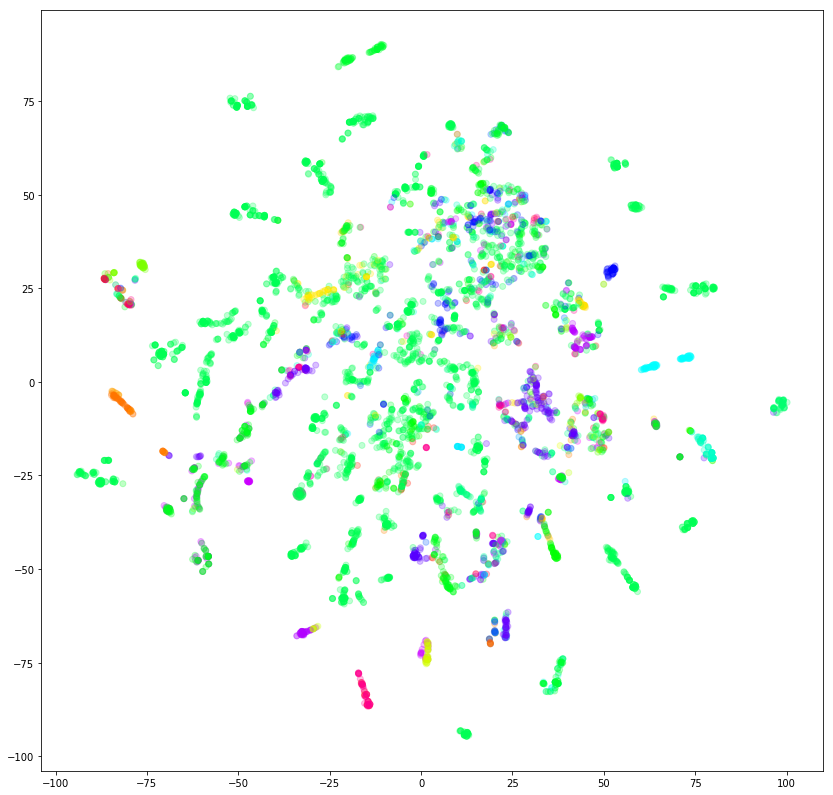

In [84]:
fig, ax = plt.subplots(figsize=(14,14))
plt.scatter(X_embedded_ae[:,0], X_embedded_ae[:,1], c=colors, alpha=0.25)

In [85]:
filename = "TNSE_BGCs_ae.csv"
TNSE_to_vsc(filename, X_embedded_ae, BGC_filename, BGC_types)

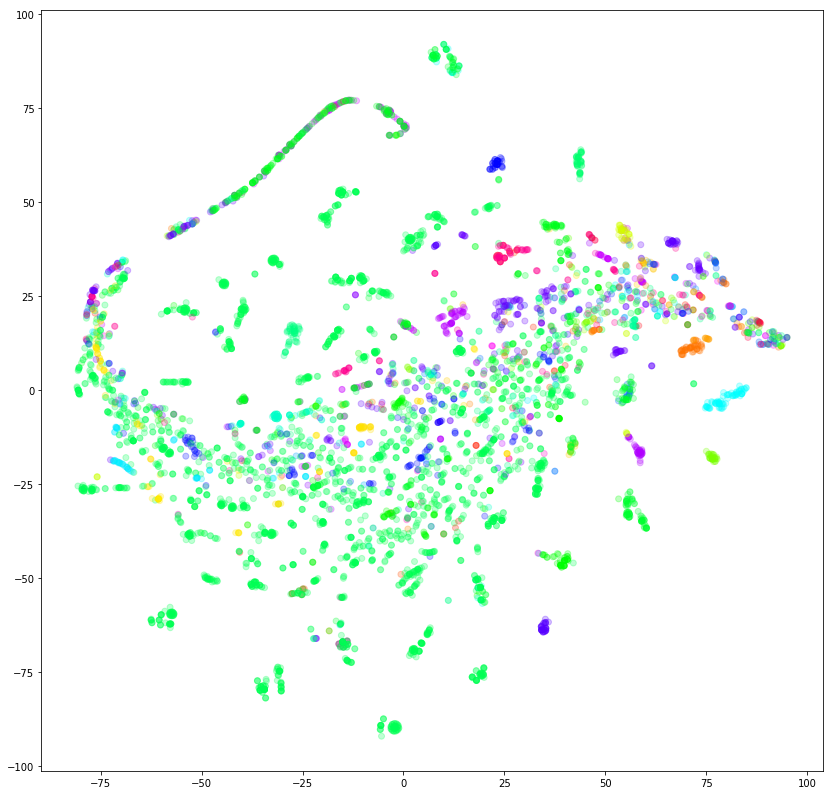

In [79]:
#THIS WAS PLOTTED AFTER 10 epochs of training....
fig, ax = plt.subplots(figsize=(14,14))
plt.scatter(X_embedded_ae[:,0], X_embedded_ae[:,1], c=colors, alpha=0.25)

In [77]:
BGC_functions.plot_bgc_genes(43, BGCs_dict, BGC_measure, num_candidates = 10, 
                   sharex=True, labels=False, dist_method = "autoencoder")

AttributeError: 'SimilarityMeasures' object has no attribute 'Cdistances_ae_idx'

#### B) PCA
Will calulate 100 dimensional representations of each document using PCA.

In [16]:
BGC_measure.get_vectors_pca(100)

In [17]:
BGC_measure.get_pca_distances(num_hits=25, method='cosine')

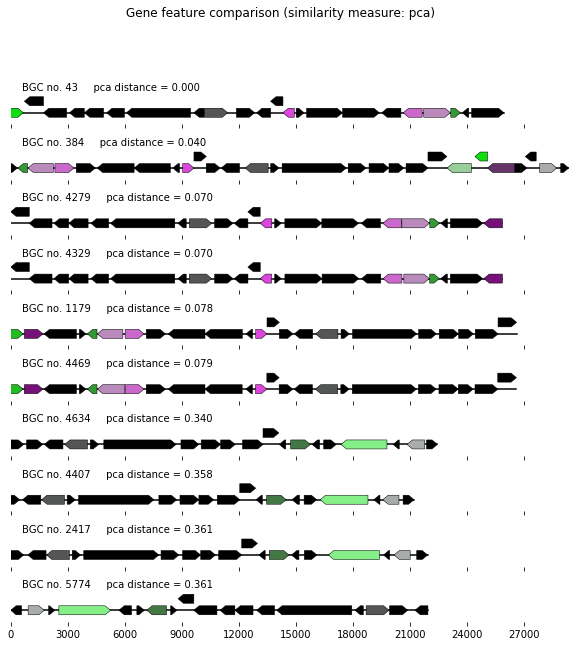

In [18]:
BGC_functions.plot_bgc_genes(43, BGCs_dict, BGC_measure, num_candidates = 10, 
                   sharex=True, labels=False, dist_method = "pca")

#### C) Doc2Vec
Will calulate 100 dimensional representations of each document using Doc2Vec.

In [19]:
file_model_doc2vec = path_sesime + 'models_trained\\model_doc2vec_bgc_crusemann.model'
BGC_measure.build_model_doc2vec(file_model_doc2vec, vector_size=100, window=50, 
                             min_count=1, workers=4, epochs=250, 
                             use_stored_model=True)

Load stored doc2vec model ...


In [20]:
BGC_measure.get_doc2vec_distances(num_hits=25, method='cosine')

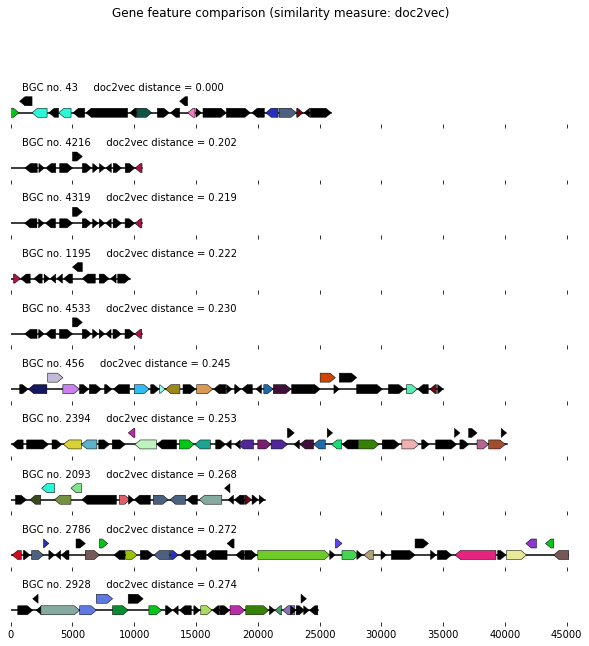

In [21]:
BGC_functions.plot_bgc_genes(43, BGCs_dict, BGC_measure, num_candidates = 10, 
                   sharex=True, labels=False, dist_method = "doc2vec")

#### D) LDA
Will calulate document distances using LDA.

In [22]:
file_model_lda = path_sesime + 'models_trained\\model_lda_bgc_crusemann.model'
BGC_measure.build_model_lda(file_model_lda, num_of_topics=100, num_pass=4, 
                        num_iter=100, use_stored_model=True)

Load stored LDA model ...


In [23]:
BGC_measure.get_lda_distances(num_hits=25)

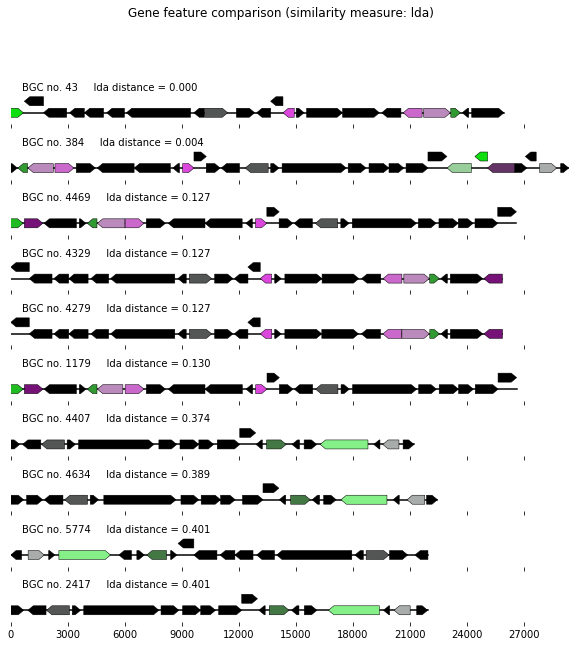

In [24]:
BGC_functions.plot_bgc_genes(43, BGCs_dict, BGC_measure, num_candidates = 10, 
                   sharex=True, labels=False, dist_method = "lda")

#### E) LSI
Will calulate document distances using LSI.

In [25]:
file_model_lsi = path_sesime + 'models_trained\\model_lsi_bgc_crusemann.model'
BGC_measure.build_model_lsi(file_model_lsi, num_of_topics=100, 
                             use_stored_model=True)

Load stored LSI model ...


In [26]:
BGC_measure.get_lsi_distances(num_hits=25)

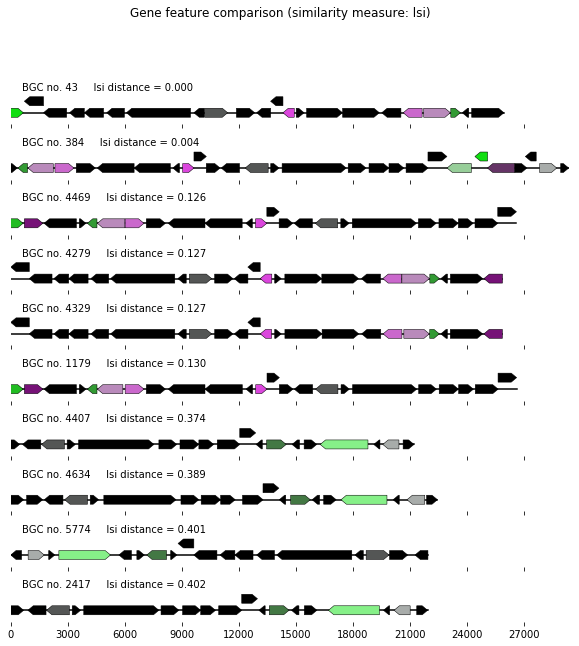

In [27]:
BGC_functions.plot_bgc_genes(43, BGCs_dict, BGC_measure, num_candidates = 10, 
                   sharex=True, labels=False, dist_method = "lsi")

### (2) Mass spec side
Import MS data and create documents.

See other notebook: LINK